In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
ac_list = []
model_names = []

In [4]:
train=pd.read_csv(r'C:\Users\USER\Desktop\train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test=pd.read_csv(r'C:\Users\USER\Desktop\test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.shape

(614, 13)

In [10]:
train.isna().sum() # checking for null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# funcion to get null value
def column_wise_null_percentage(df):
    output = round(train.isnull().sum()/len(train.index)*100,2)
    return output

In [12]:
# identify columns only with null values
NA_col = column_wise_null_percentage(train)
NA_col = NA_col[NA_col>0]
NA_col

Gender              2.12
Married             0.49
Dependents          2.44
Self_Employed       5.21
LoanAmount          3.58
Loan_Amount_Term    2.28
Credit_History      8.14
dtype: float64

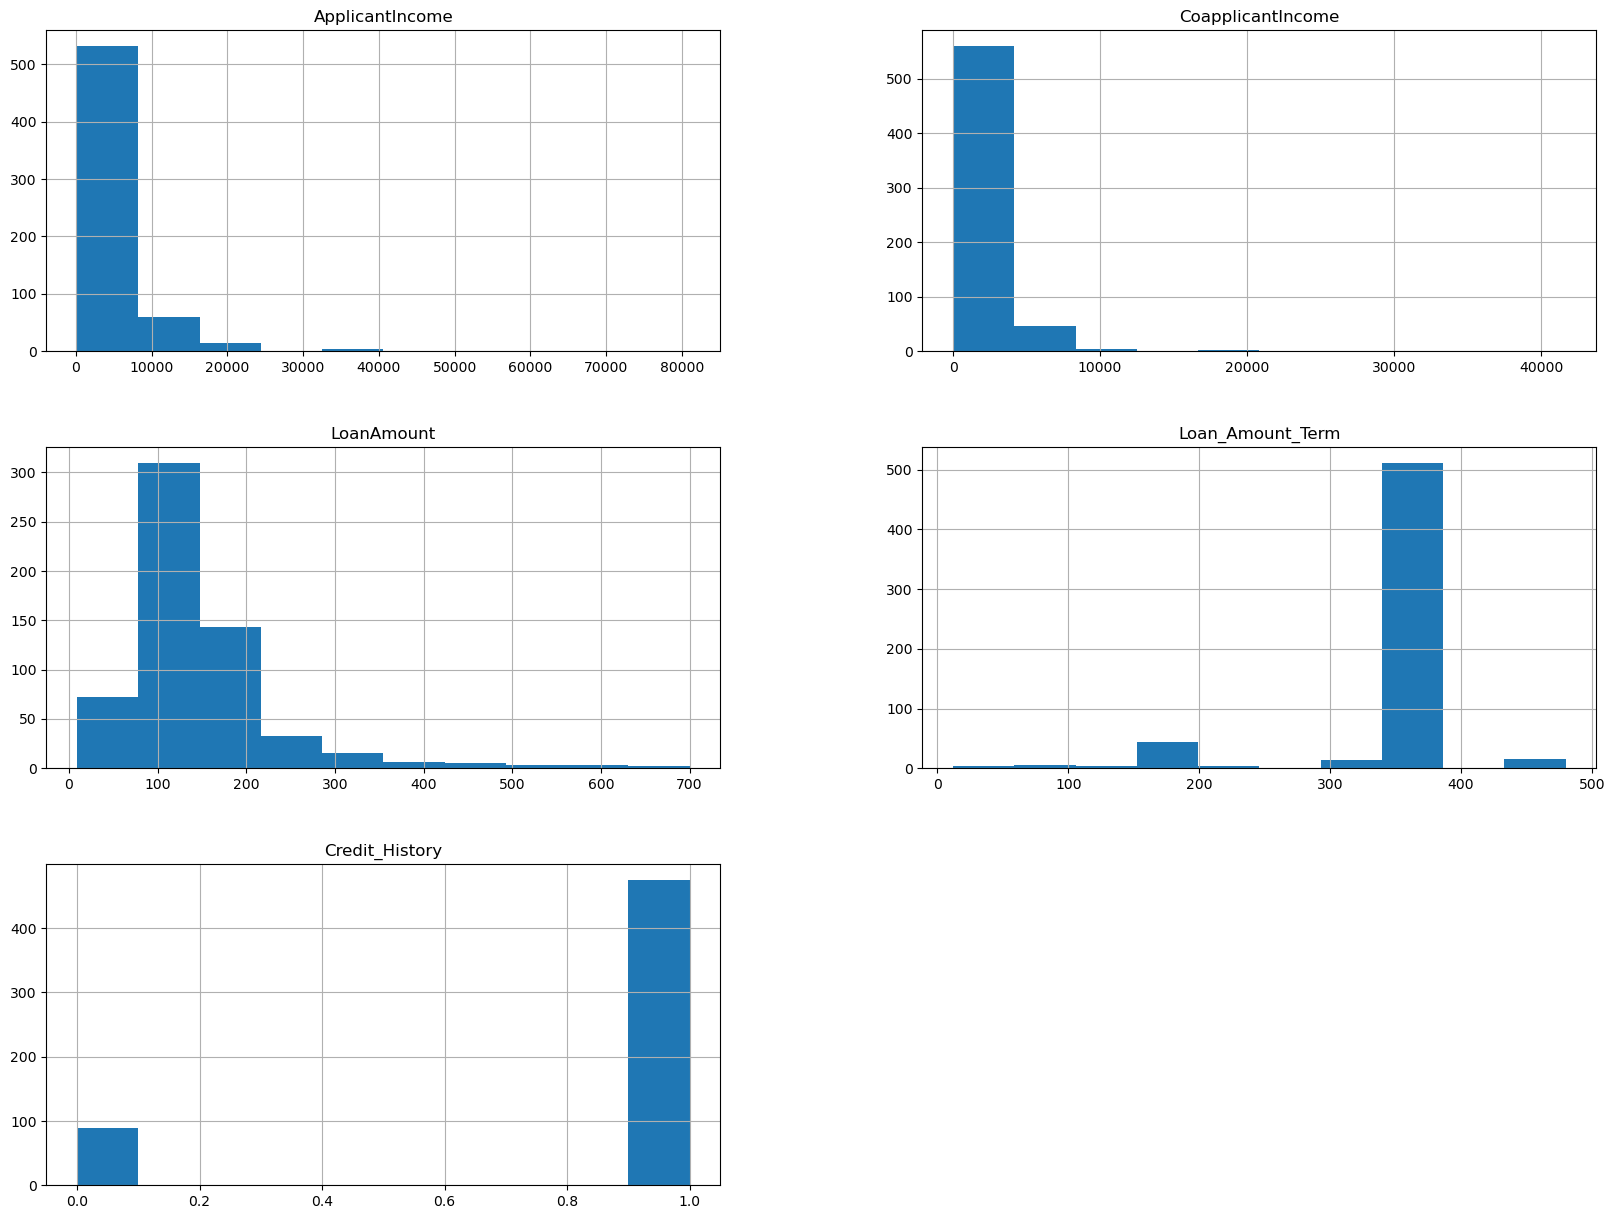

In [13]:
freqgraph=train.select_dtypes(exclude ='object')  # check distribution 
freqgraph.hist(figsize=(20,15))
plt.show() 

In [14]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
for i in [ 'Loan_Amount_Term', 'Credit_History','LoanAmount']:
     train[i]=train[i].fillna(train[i].mean())
for i in ['Gender', 'Married', 'Dependents','Self_Employed']:
           train[i]=train[i].fillna(train[i].mode()[0]) 

In [16]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train.agg(['count','size','nunique']) ## get the count, size and Unique value in each column of application data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614,614,614,614,614,614
size,614,614,614,614,614,614,614,614,614,614,614,614,614
nunique,614,2,2,4,2,2,505,287,204,11,3,3,2


In [18]:
train1= train.drop(['Loan_ID'],axis =1)   # since its many unique values
train1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
freqgraph=train1.select_dtypes(include ='object')
freqgraph

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [20]:
train1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
train2= pd.get_dummies(train1[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']])
train2

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [22]:
train1= train1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],axis =1)
train1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,Y
1,4583,1508.0,128.000000,360.0,1.0,N
2,3000,0.0,66.000000,360.0,1.0,Y
3,2583,2358.0,120.000000,360.0,1.0,Y
4,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y
610,4106,0.0,40.000000,180.0,1.0,Y
611,8072,240.0,253.000000,360.0,1.0,Y
612,7583,0.0,187.000000,360.0,1.0,Y


In [23]:
train3 = pd.concat([train1, train2], axis=1)
train3


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,Y,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,Y,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


<AxesSubplot:>

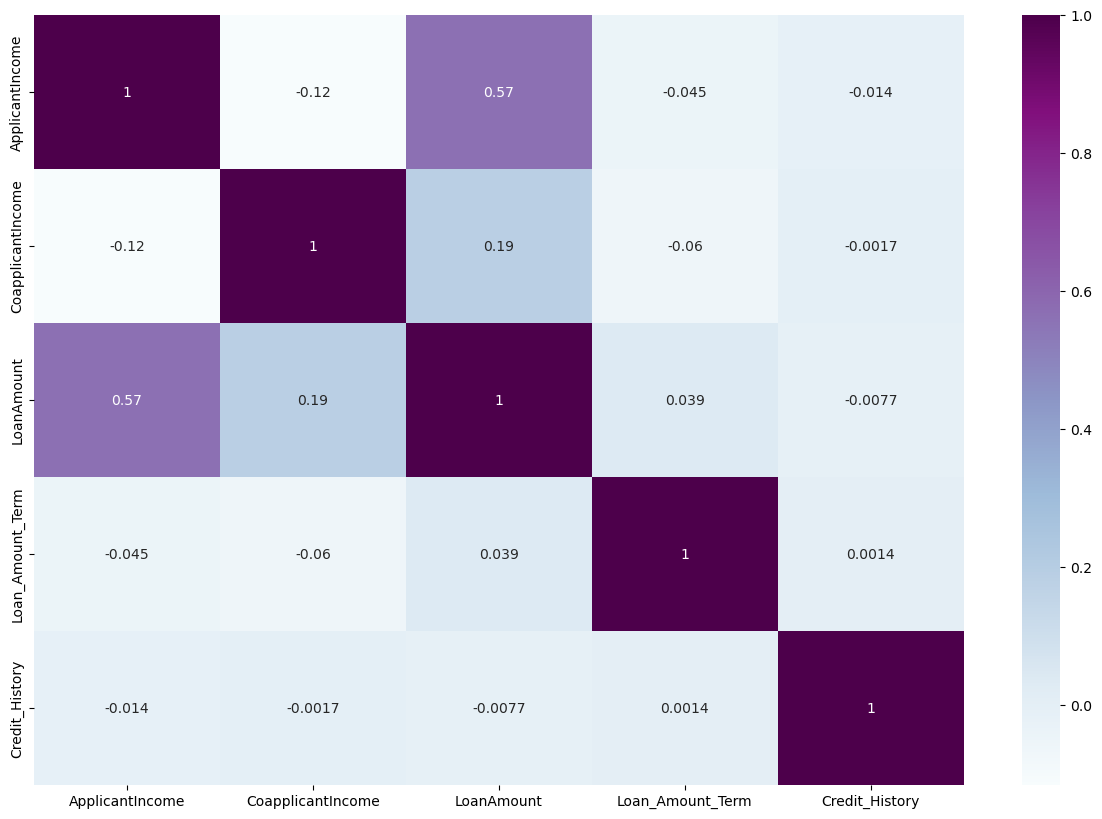

In [24]:
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

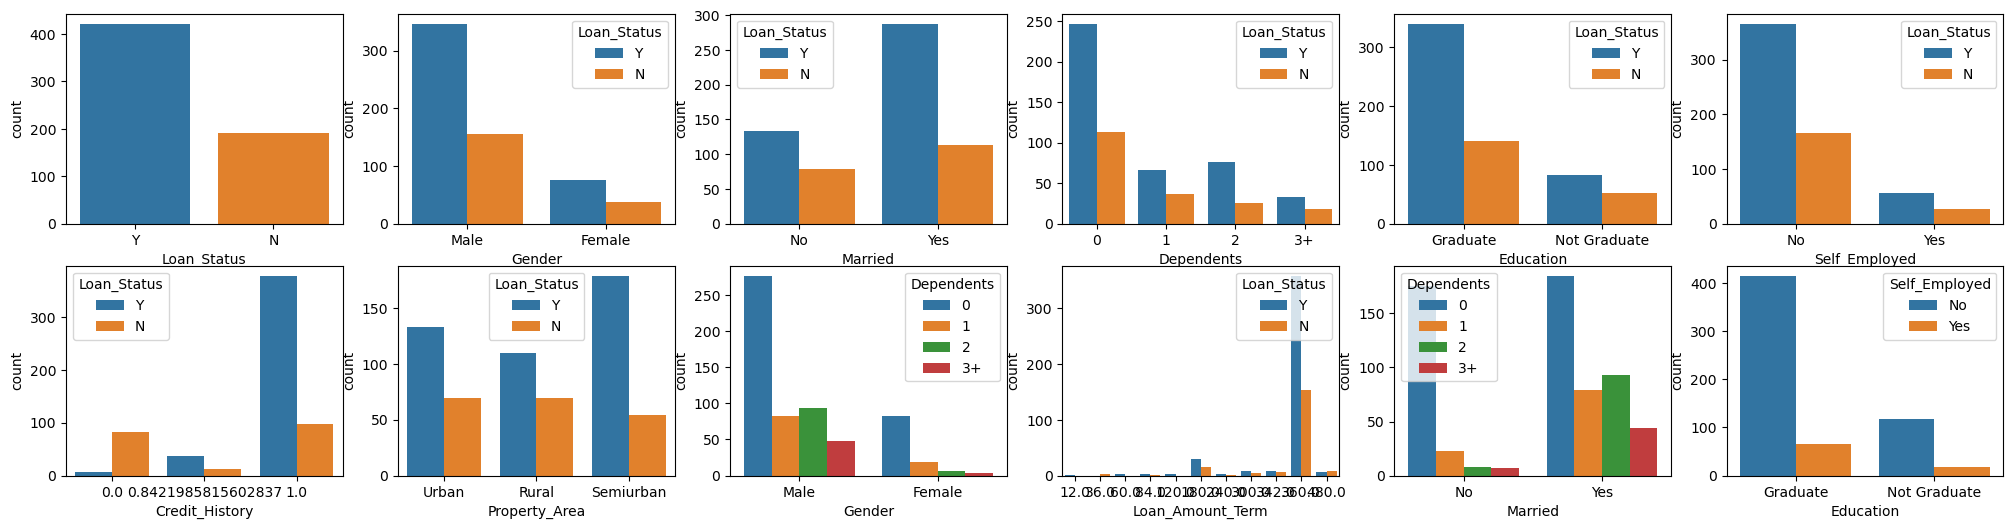

In [25]:
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=train['Loan_Status'],ax=axs[0,0])
sns.countplot(x=train['Gender'],hue=train['Loan_Status'],ax=axs[0,1])
sns.countplot(x=train['Married'],hue=train['Loan_Status'],ax=axs[0,2])
sns.countplot(x=train['Dependents'],hue=train['Loan_Status'],ax=axs[0,3])
sns.countplot(x=train['Education'],hue=train['Loan_Status'],ax=axs[0,4])
sns.countplot(x=train['Self_Employed'],hue=train['Loan_Status'],ax=axs[0,5])
sns.countplot(x=train['Credit_History'],hue=train['Loan_Status'],ax=axs[1,0])
sns.countplot(x=train['Property_Area'],hue=train['Loan_Status'],ax=axs[1,1])
sns.countplot(x=train['Gender'],hue=train['Dependents'],ax=axs[1,2])
sns.countplot(x=train['Loan_Amount_Term'],hue=train['Loan_Status'],ax=axs[1,3])
sns.countplot(x=train['Married'],hue=train['Dependents'],ax=axs[1,4])
sns.countplot(x=train['Education'],hue=train['Self_Employed'],ax=axs[1,5])
plt.show()

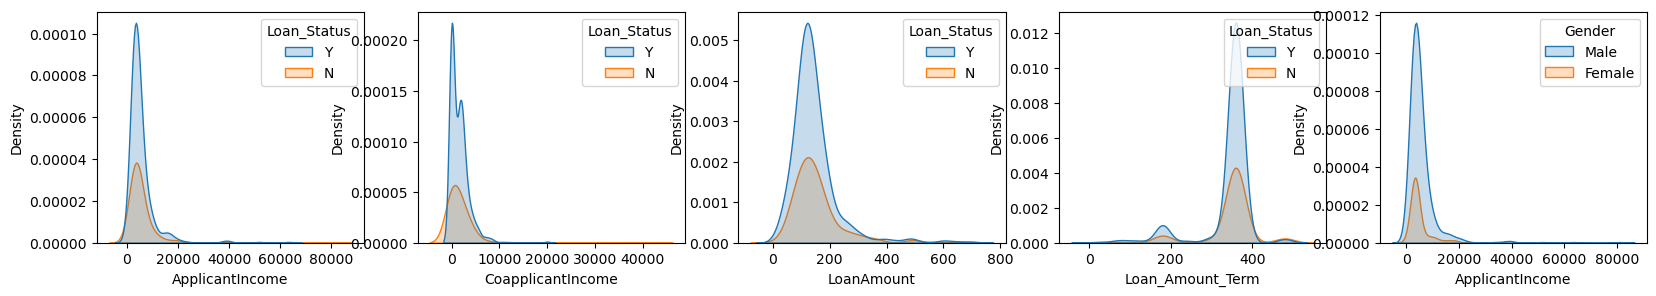

In [26]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=train['ApplicantIncome'],hue=train['Loan_Status'],fill=True,ax=axs[0])
sns.kdeplot(x=train['CoapplicantIncome'],hue=train['Loan_Status'],fill=True,ax=axs[1])
sns.kdeplot(x=train['LoanAmount'],hue=train['Loan_Status'],fill=True,ax=axs[2])
sns.kdeplot(x=train['Loan_Amount_Term'],hue=train['Loan_Status'],fill=True,ax=axs[3])
sns.kdeplot(x=train['ApplicantIncome'],hue=train['Gender'],fill=True,ax=axs[4])
plt.show()

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [28]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
for i in [ 'Loan_Amount_Term', 'Credit_History','LoanAmount']:
     test[i]=test[i].fillna(test[i].mean())
for i in ['Gender', 'Dependents','Self_Employed']:
           test[i]=test[i].fillna(test[i].mode()[0]) 

In [30]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

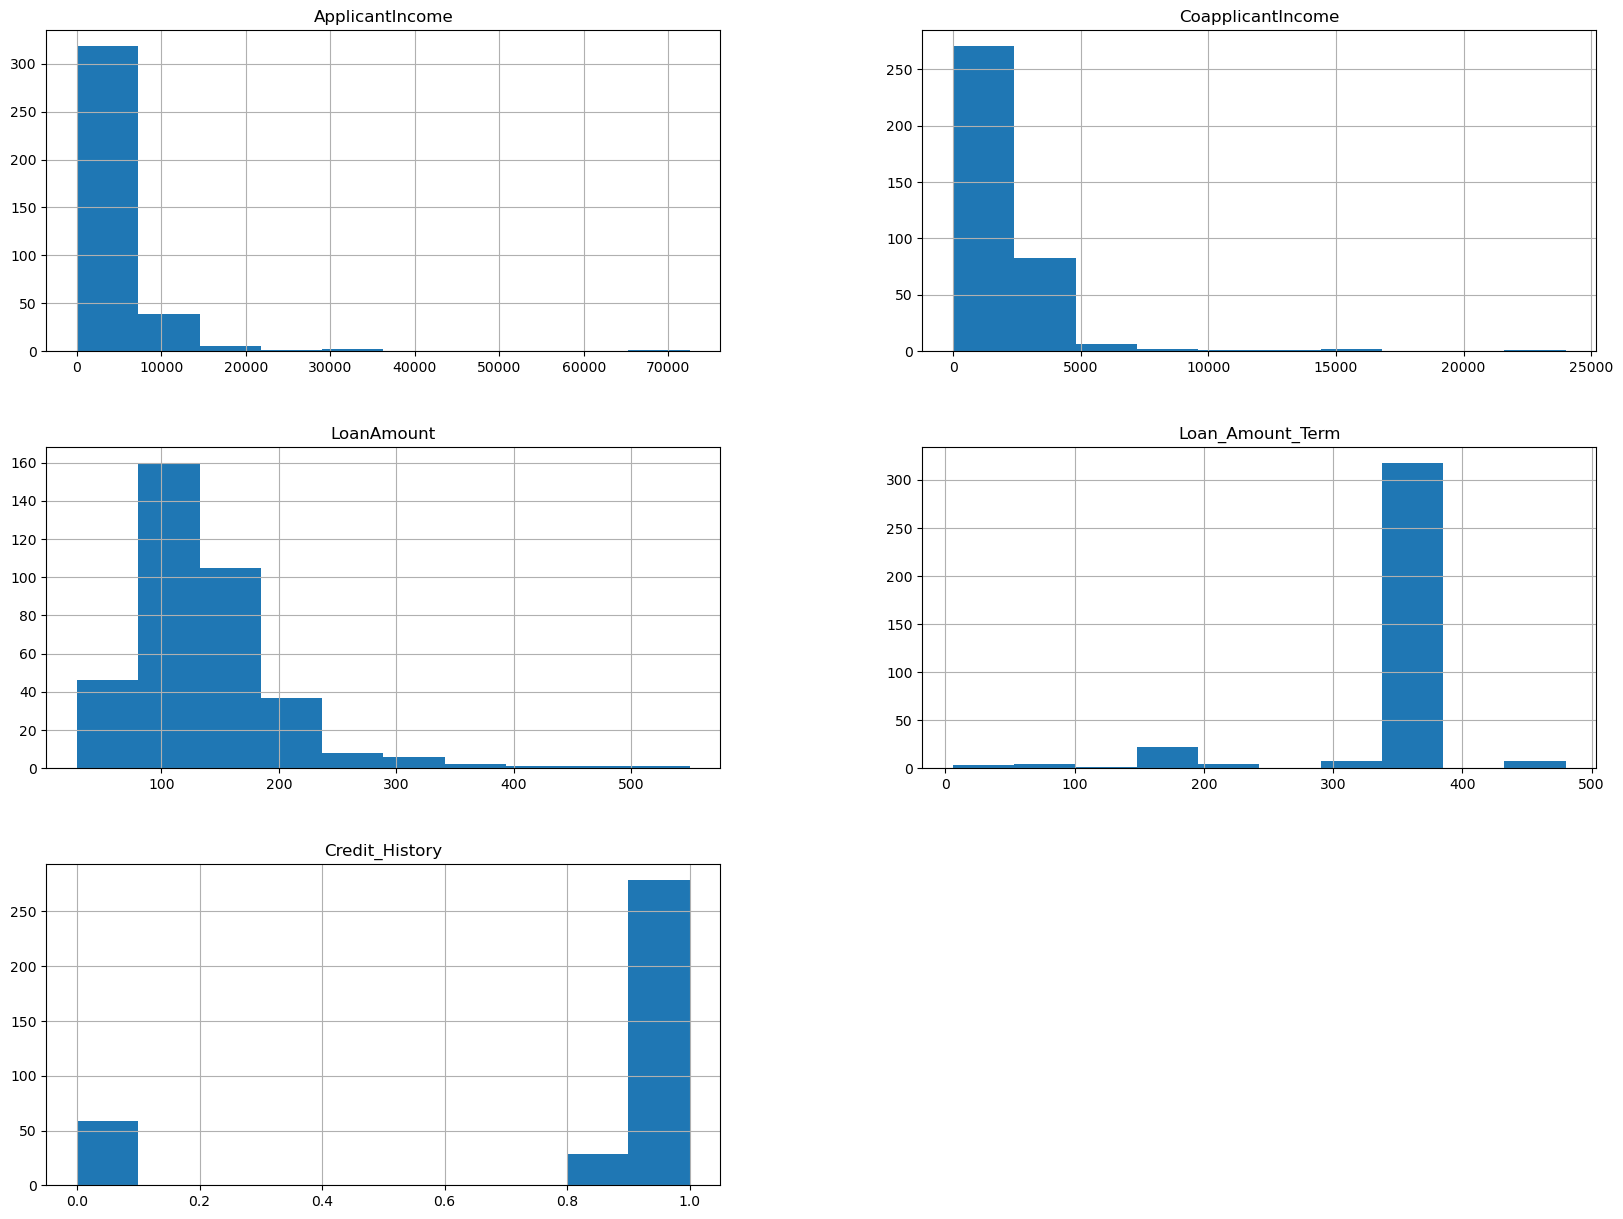

In [31]:
freqgraph=test.select_dtypes(exclude ='object')
freqgraph.hist(figsize=(20,15))
plt.show() 

In [32]:
test.agg(['count','size','nunique'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,367,367,367,367,367,367,367,367,367,367,367
size,367,367,367,367,367,367,367,367,367,367,367,367
nunique,367,2,2,4,2,2,314,194,145,13,3,3


In [33]:
test1= test.drop(['Loan_ID'],axis =1)
test1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [34]:
test2= pd.get_dummies(test1[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']])
test2


,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [35]:

test1= test1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],axis =1)
train1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,Y
1,4583,1508.0,128.000000,360.0,1.0,N
2,3000,0.0,66.000000,360.0,1.0,Y
3,2583,2358.0,120.000000,360.0,1.0,Y
4,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y
610,4106,0.0,40.000000,180.0,1.0,Y
611,8072,240.0,253.000000,360.0,1.0,Y
612,7583,0.0,187.000000,360.0,1.0,Y


In [36]:
test3 = pd.concat([test1, test2], axis=1)
test3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [37]:
y=train3['Loan_Status']  # target
X=train3.drop('Loan_Status',axis=1) # features

In [38]:
from sklearn.preprocessing import StandardScaler   # StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [39]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) # split it to train and test set

In [40]:
print(X_train.shape, y_train.shape, X_test.shape)

(460, 20) (460,) (154, 20)


In [41]:

display(pd.DataFrame(X_train).head(),pd.DataFrame(X_test).head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.349023,0.067977,-0.779004,0.279851,0.451640,-0.472343,0.472343,-0.728816,0.728816,-1.190514,-0.446339,2.253710,-0.300975,-1.892641,1.892641,0.392601,-0.392601,-0.641478,-0.782016,1.428147
1,-0.229922,0.300545,-0.076363,0.279851,0.451640,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
2,0.277936,-0.554487,-0.255001,-4.384325,0.451640,-0.472343,0.472343,-0.728816,0.728816,-1.190514,-0.446339,-0.443713,3.322532,-1.892641,1.892641,-2.547117,2.547117,-0.641478,-0.782016,1.428147
3,-0.074288,-0.554487,-0.255001,0.279851,0.451640,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147
4,-0.323302,-0.126971,-0.219273,0.279851,-2.410441,-0.472343,0.472343,-0.728816,0.728816,-1.190514,-0.446339,-0.443713,3.322532,0.528362,-0.528362,0.392601,-0.392601,-0.641478,1.278747,-0.700208


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.602802,-0.554487,0.971642,0.279851,4.516405e-01,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,1.278747,-0.700208
1,-0.179136,-0.554487,-0.195455,0.279851,3.177548e-16,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,1.278747,-0.700208
2,-0.202563,-0.059594,0.138001,0.279851,4.516405e-01,-0.472343,0.472343,-0.728816,0.728816,-1.190514,-0.446339,2.253710,-0.300975,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
3,-0.410130,-0.554487,-0.898095,0.279851,4.516405e-01,2.117107,-2.117107,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
4,-0.439946,-0.554487,-0.910004,0.279851,4.516405e-01,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,1.278747,-0.700208


In [42]:
pd.DataFrame( y_test.value_counts() )

,Loan_Status
Y,100
N,54


# MODELS

In [43]:
#Logistic Regression
lr=LogisticRegression(solver='lbfgs', random_state=42,max_iter=1000) # create an instance 
model=lr.fit(X_train,y_train)# create the model
Y_pred = model.predict(X_test)# preditction
accuracy_score(y_test,Y_pred ) #accuracy


0.7792207792207793

In [44]:
print(classification_report(y_test,Y_pred)) 

              precision    recall  f1-score   support

           N       0.92      0.41      0.56        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.78       154
   macro avg       0.84      0.69      0.71       154
weighted avg       0.81      0.78      0.75       154



In [45]:
MR_ac=accuracy_score(y_test,Y_pred)
ac_list.append(MR_ac)
model_names.append('LR')

In [46]:
#GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gau_pred = gaussian.predict(X_test)
accuracy_score(y_test,Y_pred)

0.7792207792207793

In [47]:
print(classification_report(y_test,gau_pred))

              precision    recall  f1-score   support

           N       0.88      0.43      0.57        54
           Y       0.76      0.97      0.85       100

    accuracy                           0.78       154
   macro avg       0.82      0.70      0.71       154
weighted avg       0.80      0.78      0.75       154



In [48]:
gau_ac = accuracy_score(y_test,gau_pred)
ac_list.append(gau_ac)
model_names.append('gaussian_ac')


In [49]:
# Support vector machines  with rbf kernal
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_rbf_pred = svc.predict(X_test)
accuracy_score(y_test,svc_rbf_pred )

0.7792207792207793

In [50]:
print(classification_report(y_test,svc_rbf_pred ))

              precision    recall  f1-score   support

           N       0.95      0.39      0.55        54
           Y       0.75      0.99      0.85       100

    accuracy                           0.78       154
   macro avg       0.85      0.69      0.70       154
weighted avg       0.82      0.78      0.75       154



In [51]:
SVC_rbf_ac = accuracy_score(y_test, svc_rbf_pred )
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

In [52]:
# Support vector machines  with linear kernal

svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
svc_lin_pred=svm_clf.predict(X_test)
accuracy_score(y_test,svc_lin_pred)

0.7727272727272727

In [53]:
print(classification_report(y_test,svc_lin_pred))

              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [54]:
SVC_lin_ac = accuracy_score(y_test,svc_lin_pred)
ac_list.append(SVC_lin_ac )
model_names.append('linear_svc_ac')

In [55]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
accuracy_score(y_test,Y_pred  )

0.7532467532467533

In [56]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           N       0.77      0.43      0.55        54
           Y       0.75      0.93      0.83       100

    accuracy                           0.75       154
   macro avg       0.76      0.68      0.69       154
weighted avg       0.76      0.75      0.73       154



In [57]:
 Perceptron_ac = accuracy_score(y_test, Y_pred)
ac_list.append(Perceptron_ac)
model_names.append('Perceptron')

In [58]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
accuracy_score(y_test,sgd_pred )

0.7792207792207793

In [59]:
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

           N       0.76      0.54      0.63        54
           Y       0.78      0.91      0.84       100

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



In [60]:
SGD_ac = accuracy_score(y_test, sgd_pred)
ac_list.append( SGD_ac)
model_names.append('sgd')

In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
DT_pred = decision_tree.predict(X_test)
accuracy_score(y_test,DT_pred )



0.6428571428571429

In [62]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           N       0.49      0.46      0.48        54
           Y       0.72      0.74      0.73       100

    accuracy                           0.64       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.64      0.64      0.64       154



In [63]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

In [64]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)


In [65]:
accuracy_score(y_test,RFA_pred)

0.7792207792207793

In [66]:
print(classification_report(y_test, RFA_pred))

              precision    recall  f1-score   support

           N       0.88      0.43      0.57        54
           Y       0.76      0.97      0.85       100

    accuracy                           0.78       154
   macro avg       0.82      0.70      0.71       154
weighted avg       0.80      0.78      0.75       154



In [67]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

In [68]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)   # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

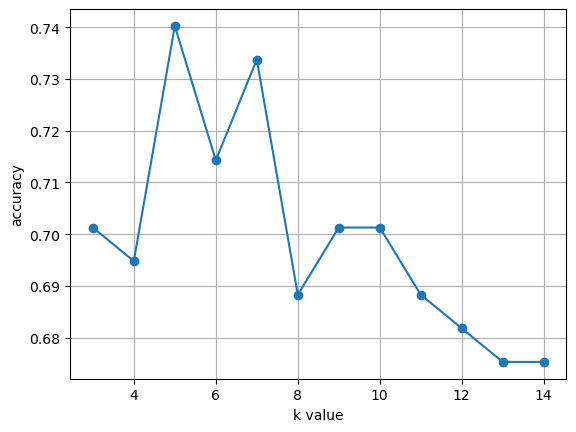

In [69]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [70]:
knn=KNeighborsClassifier(n_neighbors=5)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.7402597402597403

In [71]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           N       0.79      0.35      0.49        54
           Y       0.73      0.95      0.83       100

    accuracy                           0.74       154
   macro avg       0.76      0.65      0.66       154
weighted avg       0.75      0.74      0.71       154



In [72]:
KNN_ac = accuracy_score(y_test,  y_pred_knn)
ac_list.append(KNN_ac )
model_names.append('KNN')

# Hyperparameter tuning of RFA

In [73]:

rf_clf=RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12,random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)
accuracy_score(y_test,RFA_pred)

0.7532467532467533

THE RESULTS SHOWS THAT TUNED RFA IS 75 % WHILE UNTUNNED ONE IS 78% .

# Comparing models

In [74]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': "Accuracy"}, inplace=True)
round(model_ac*100)

,Accuracy
LR,78.0
gaussian_ac,78.0
SVC_rbf_ac,78.0
linear_svc_ac,77.0
Perceptron,75.0
sgd,78.0
DT,64.0
RFA,78.0
KNN,74.0


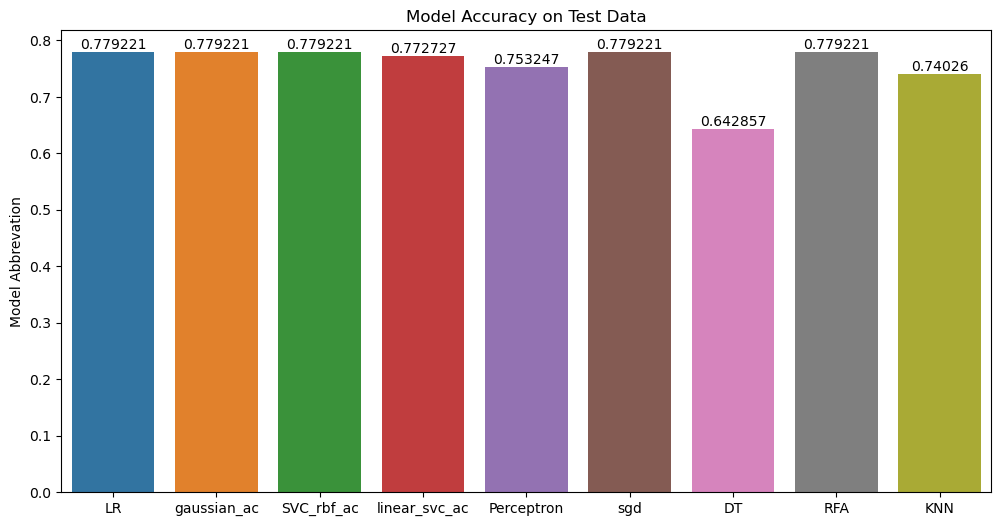

In [75]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='Accuracy', x=model_ac.index, data=model_ac)
ax.bar_label(ax.containers[0])
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()

The result shows that the models which shows the most accuracy are Linear Regression, Support vector machines  with rbf kernal
and Randam Forset Alogothim.

# I have decided to check the test file with Logistic Regression since its most accuate among the group

In [76]:
X_train = train3.drop('Loan_Status', axis = 1)
y_train = train3['Loan_Status']
X_test = test3.copy()
print(X_train.shape, y_train.shape, X_test.shape)

(614, 20) (614,) (367, 20)


In [77]:
from sklearn.preprocessing import StandardScaler   # StandardScaler used to nomalize the numerical features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [78]:
lr=LogisticRegression(solver='lbfgs', random_state=42,max_iter=1000) # create an instance 
model=lr.fit(X_train,y_train)        # create the model
Y_pred = model.predict(X_test)         # preditction


In [79]:
submission=test[['Loan_ID']]
submission

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [80]:
submission['Loan_Status']=Y_pred
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [81]:
submission.to_csv('submission.csv',index=False)